# Внутренний диаметр

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

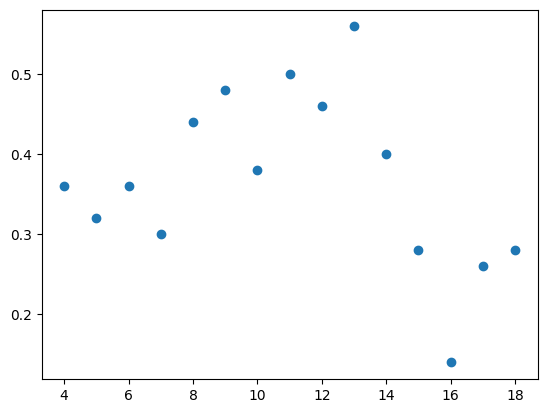

In [ ]:
df = pd.read_excel("first.xlsx")
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=False)

x_train = train_set["d"].to_numpy()
y_train = train_set["delta D"].to_numpy()

x_test = test_set["d"].to_numpy()
y_test = test_set["delta D"].to_numpy()

plt.scatter(x_train, y_train)
plt.show()

# plt.title("Зависимость номинального диаметра от delta D")
# plt.scatter(df["d"], df["delta D"])
# plt.show()

In [ ]:
# poly = PolynomialFeatures(degree=2)
# x_poly = poly.fit_transform(x_train.reshape(-1, 1))
# poly.fit(x_poly, y_train.reshape(-1, 1))

linear = linear_model.LinearRegression()
linear.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
# linear.fit(x_poly, y_train.reshape(-1, 1))

LinearRegression()

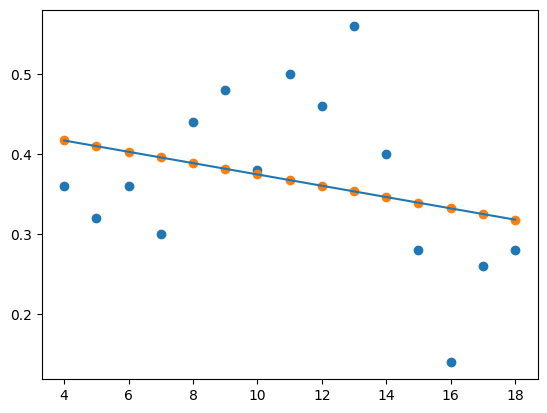

In [ ]:
y_predicted = linear.predict(x_train.reshape(-1, 1))
# y_predicted = linear.predict(x_poly)

plt.scatter(x_train, y_train)
plt.scatter(x_train, y_predicted)
plt.plot(x_train, y_predicted)

In [ ]:
# linear.score(poly.fit_transform(x_test.reshape(-1, 1)), y_test.reshape(-1, 1))
linear.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))

# linear.predict(poly.fit_transform([[100]]))

# linear.predict([[100]])

-0.07988872092046906

# Толщина стенки и внутренний диаметр

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_excel("second.xlsx")

X = df[["d", "s"]]
y = df["delta D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

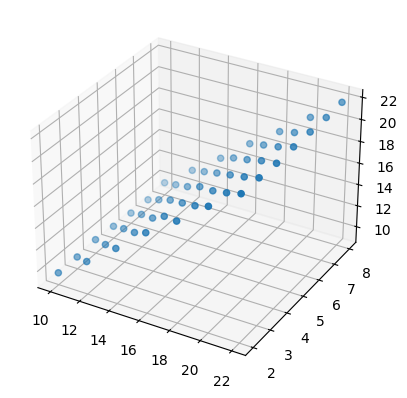

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X_train["d"], X_train["s"], y_train)
ax.scatter(df["d"], df["s"], df["D"])

In [ ]:
y_predicted = model.predict(X_test)
model.score(X_test, y_test)

-0.1259283431616467

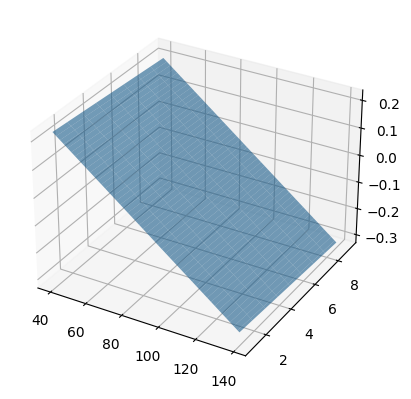

In [ ]:
xx, yy = np.meshgrid(range(40, 140), range(1, 10))
zz = model.coef_[0] * xx + model.coef_[1] * yy + model.intercept_

ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.6)
plt.show()

In [ ]:
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X_train.to_numpy())
lr = linear_model.LinearRegression()
lr.fit(X_poly, y_train)

c = lr.coef_
i = lr.intercept_
print(c, i)


[ 0.         -0.03443279  0.10463999  0.00136677 -0.00249457 -0.0066092 ] 0.3807151343754669


In [ ]:
# PREDICTION
new_data_poly = pr.transform([[50, 8]])
print(lr.predict(new_data_poly))

[1.49229237]


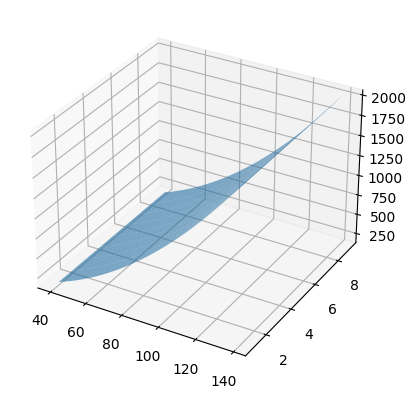

In [ ]:
xx, yy = np.meshgrid(range(40, 140), range(1, 10))

## [1, a, b, a^2, ab, b^2] - each var to all degrees + all interactions between vars
zz = c[0]*xx + c[1]*yy + c[2]*xx**2 + c[3]*yy**2 + c[4]*xx*c[5]*yy + i

#fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_surface(xx, yy, zz, alpha=0.6)
#ax.view_init(15, 90)

plt.show()